<a href="https://colab.research.google.com/github/VR952004/DataAnalysis_MachineLearningProjects/blob/main/StudentPerformancePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/csv files/Student_Performance.csv")

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

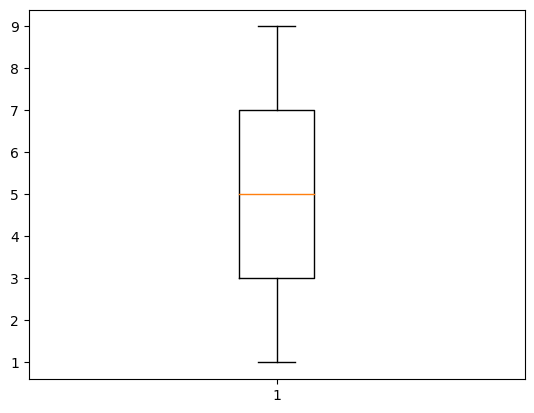

In [ ]:
plt.boxplot(df['Hours Studied'])
plt.show()

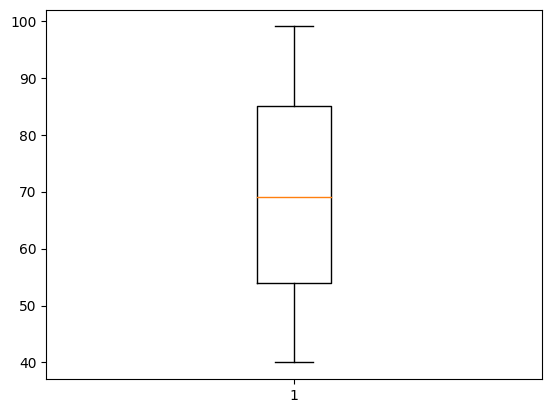

In [ ]:
plt.boxplot(df['Previous Scores'])
plt.show()

[]

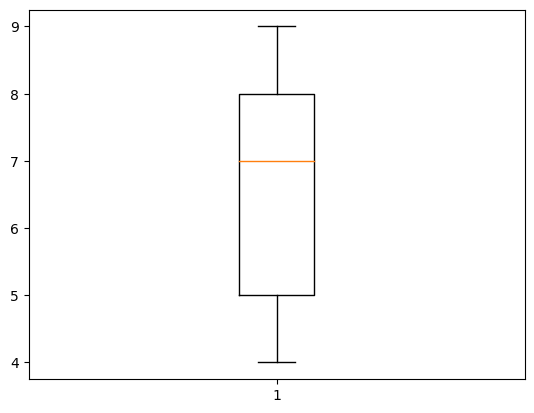

In [ ]:
plt.boxplot(df['Sleep Hours'])
plt.plot()

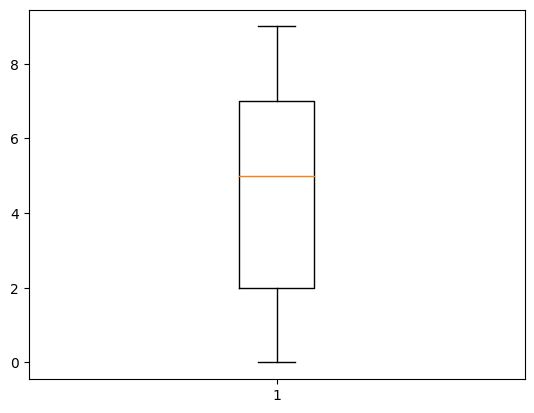

In [ ]:
plt.boxplot(df['Sample Question Papers Practiced'])
plt.show()

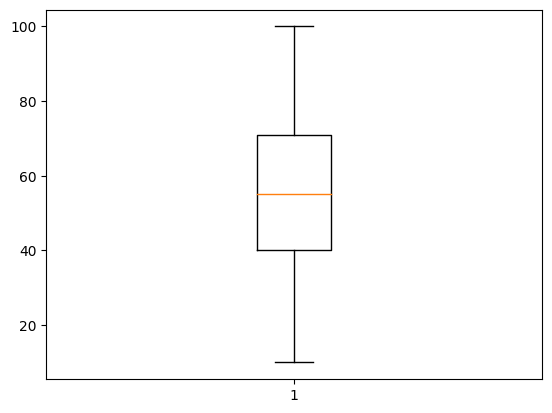

In [ ]:
plt.boxplot(df['Performance Index'])
plt.show()

The data already seems to be clean since there are no null values or outliers that can disrupt the accuracy of the predictions made by the model.

In [ ]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#Label Encoding the Extracurricular Activity column
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Extracurricular Activities']=le.fit_transform(df['Extracurricular Activities'])

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
train=df.sample(frac=0.8,random_state=0)  #frac=0.8 means 80% of the data will be set as training, random_state=0 means that the rows will not be selected at random.
test=df.drop(train.index)   #the test dataset is the df-training so we drop the rows from df which have the indices from training.

In [ ]:
train_y=train['Performance Index'].values
test_y=test['Performance Index'].values

train_y.reshape(8000,1)
test_y.reshape(2000,1)

array([[91.],
       [33.],
       [85.],
       ...,
       [61.],
       [44.],
       [23.]])

In [ ]:
train_x=train.drop(columns=["Performance Index"])
test_x=test.drop(columns=["Performance Index"])

In [ ]:
train_x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9394,4,67,0,9,3
898,8,60,0,4,7
2398,6,90,0,5,6
5906,1,51,1,6,6
2343,2,90,0,5,9
...,...,...,...,...,...
8673,7,62,0,7,2
8175,7,59,0,8,9
4933,1,58,1,9,4
504,7,85,1,9,4


In [ ]:
model=keras.Sequential([
    layers.Dense(5,activation='relu'),

    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(1)
])

In [ ]:
model.compile(loss='mse',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),metrics=['mae','mse'])

We must understand that we will not make use of the accuracy metric, instead we will use the metrics mean absolute error(mae) and mean squared error(mse), over the successive we can observe that the loss as well as these error metrics are reducing this shows that our neural network is improving its power to accurately predict the performance index.

In [ ]:
trained_model=model.fit(train_x,train_y,batch_size=30,epochs=200,verbose=2,validation_split=0.2)
#validation_split is used to validate the model while training itself,0.2 means 20% of training data will go into validation

Epoch 1/200
214/214 - 3s - loss: 288.2319 - mae: 10.3251 - mse: 288.2319 - val_loss: 177.5233 - val_mae: 10.9145 - val_mse: 177.5233 - 3s/epoch - 16ms/step
Epoch 2/200
214/214 - 1s - loss: 28.6743 - mae: 4.3340 - mse: 28.6743 - val_loss: 67.9250 - val_mae: 7.3547 - val_mse: 67.9250 - 1s/epoch - 5ms/step
Epoch 3/200
214/214 - 1s - loss: 26.9986 - mae: 4.1653 - mse: 26.9986 - val_loss: 532.7826 - val_mae: 20.0207 - val_mse: 532.7826 - 1s/epoch - 5ms/step
Epoch 4/200
214/214 - 2s - loss: 29.2627 - mae: 4.3376 - mse: 29.2627 - val_loss: 52.6943 - val_mae: 6.6536 - val_mse: 52.6943 - 2s/epoch - 8ms/step
Epoch 5/200
214/214 - 2s - loss: 25.1719 - mae: 3.9973 - mse: 25.1719 - val_loss: 5.6822 - val_mae: 1.9322 - val_mse: 5.6822 - 2s/epoch - 8ms/step
Epoch 6/200
214/214 - 1s - loss: 25.6065 - mae: 3.9322 - mse: 25.6065 - val_loss: 65.3144 - val_mae: 7.1664 - val_mse: 65.3144 - 1s/epoch - 5ms/step
Epoch 7/200
214/214 - 1s - loss: 28.3262 - mae: 4.3293 - mse: 28.3262 - val_loss: 13.0238 - val_ma

In [ ]:
model.evaluate(test_x,test_y,batch_size=30,verbose=2)

67/67 - 0s - loss: 7.7719 - mae: 2.2719 - mse: 7.7719 - 135ms/epoch - 2ms/step


[7.771926403045654, 2.271857976913452, 7.771926403045654]

In [ ]:
td=pd.DataFrame(trained_model.history)
td['epoch']=trained_model.epoch
td.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
195,24.459829,3.933585,24.459829,4.672502,1.698374,4.672502,195
196,21.297913,3.714524,21.297913,4.693046,1.719776,4.693046,196
197,19.081467,3.488647,19.081467,5.433584,1.846308,5.433584,197
198,22.090826,3.728345,22.090826,22.916637,4.263487,22.916637,198
199,21.780666,3.739358,21.780666,7.610287,2.269345,7.610287,199


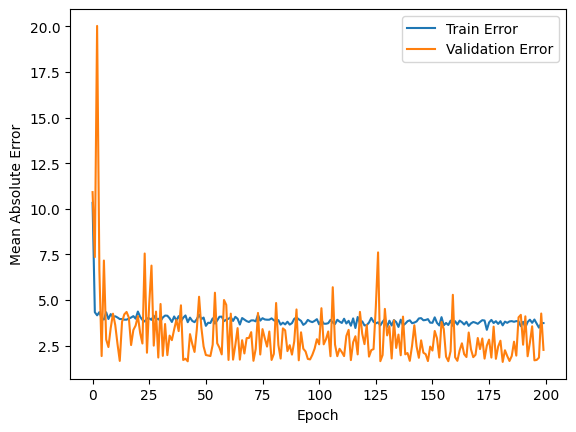

In [ ]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')

plt.plot(td['epoch'],td['mae'],label='Train Error')
plt.plot(td['epoch'],td['val_mae'],label='Validation Error')

plt.legend()

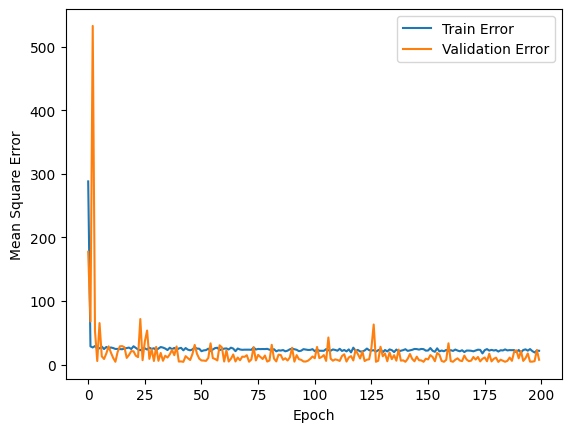

In [ ]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')

plt.plot(td['epoch'],td['mse'],label='Train Error')
plt.plot(td['epoch'],td['val_mse'],label='Validation Error')

plt.legend()

In [ ]:
model.predict(test_x)

63/63 [==============================] - 0s 2ms/step


array([[93.078   ],
       [35.418365],
       [86.8015  ],
       ...,
       [59.040314],
       [45.395767],
       [23.568102]], dtype=float32)

In [ ]:
test_x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
13,6,47,0,4,2
21,6,96,0,9,0
25,7,62,1,7,4
26,4,79,0,8,9
...,...,...,...,...,...
9963,9,70,0,9,9
9969,7,48,1,8,8
9972,4,75,0,6,3
9982,8,51,0,5,1


In [ ]:
model.predict(np.array([[6,85,0,5,3]]))

1/1 [==============================] - 0s 23ms/step


array([[74.26862]], dtype=float32)

In [ ]:
model.save('/content/drive/MyDrive/saved_models/studentPerformance.h5')
#the save function saves everything from the model architecture to the weights optimizers as well as the current state of the model similar to checkpoints.
#the parameter of the save function is the path for saving the model.Also remember to save the file with the .h5 extension such that it is easier to load.
#You can even give a name to the file.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

newModel=load_model('/content/drive/MyDrive/saved_models/studentPerformance.h5')  #For loading the saved file we first import load_model and then use the load_model method.

In [ ]:
newModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 256)               1536      
                                                                 
 batch_normalization_6 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_7 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 256)              

In [ ]:
newModel.optimizer

In [ ]:
pred_val=newModel.predict(np.array([[8,68,1,5,1]]))
print(pred_val)

1/1 [==============================] - 0s 71ms/step
[[63.26538]]
